# Exploring

In [1]:
import numpy as np
import rasterio

ModuleNotFoundError: No module named 'rasterio'

In [2]:
filepath = '../data/worldview1_ntf/29APR15WV010500015APR29062253-P1BS-500308331010_01_P059.ntf'

In [3]:
dataset = rasterio.open(filepath)

/opt/conda/envs/py35/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


In [4]:
dataset.name

'../data/worldview1_ntf/29APR15WV010500015APR29062253-P1BS-500308331010_01_P059.ntf'

In [5]:
dataset.mode

'r'

In [6]:
dataset.closed

False

In [7]:
dataset.count

1

In [8]:
dataset.width

35840

In [9]:
dataset.height

14336

In [10]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint16'}

In [11]:
dataset.dtypes

('uint16',)

In [12]:
dataset.bounds

BoundingBox(left=0.0, bottom=14336.0, right=35840.0, top=0.0)

In [13]:
dataset.transform

/opt/conda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[0.0, 1.0, 0.0, 0.0, 0.0, 1.0]

In [14]:
dataset.crs

CRS({})

"CRS({})" is a bad sign. We may need to set the coordinate reference system manually. My goal now is to view the raster, or at least a part of it. We may need to use GDAL (instead of rasterio, a Python wrapper for GDAL) to work with NITF files.

In [15]:
dataset.indexes

(1,)

In [16]:
band1 = dataset.read(1)

In [17]:
band1.shape

(14336, 35840)

In [18]:
band1

array([[1716, 1725, 1735, ...,    0,    0,    0],
       [1720, 1729, 1732, ...,    0,    0,    0],
       [1719, 1725, 1736, ...,    0,    0,    0],
       ..., 
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

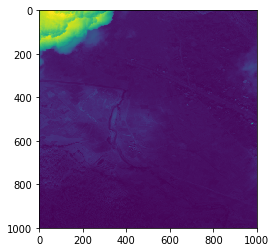

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(band1[:1000, :1000])

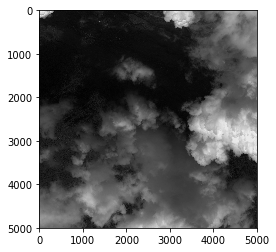

In [25]:
plt.imshow(band1[:5000, :5000], cmap='gray')

In [20]:
im = band1[:1000, :1000]

In [21]:
from tools2 import plots, plot

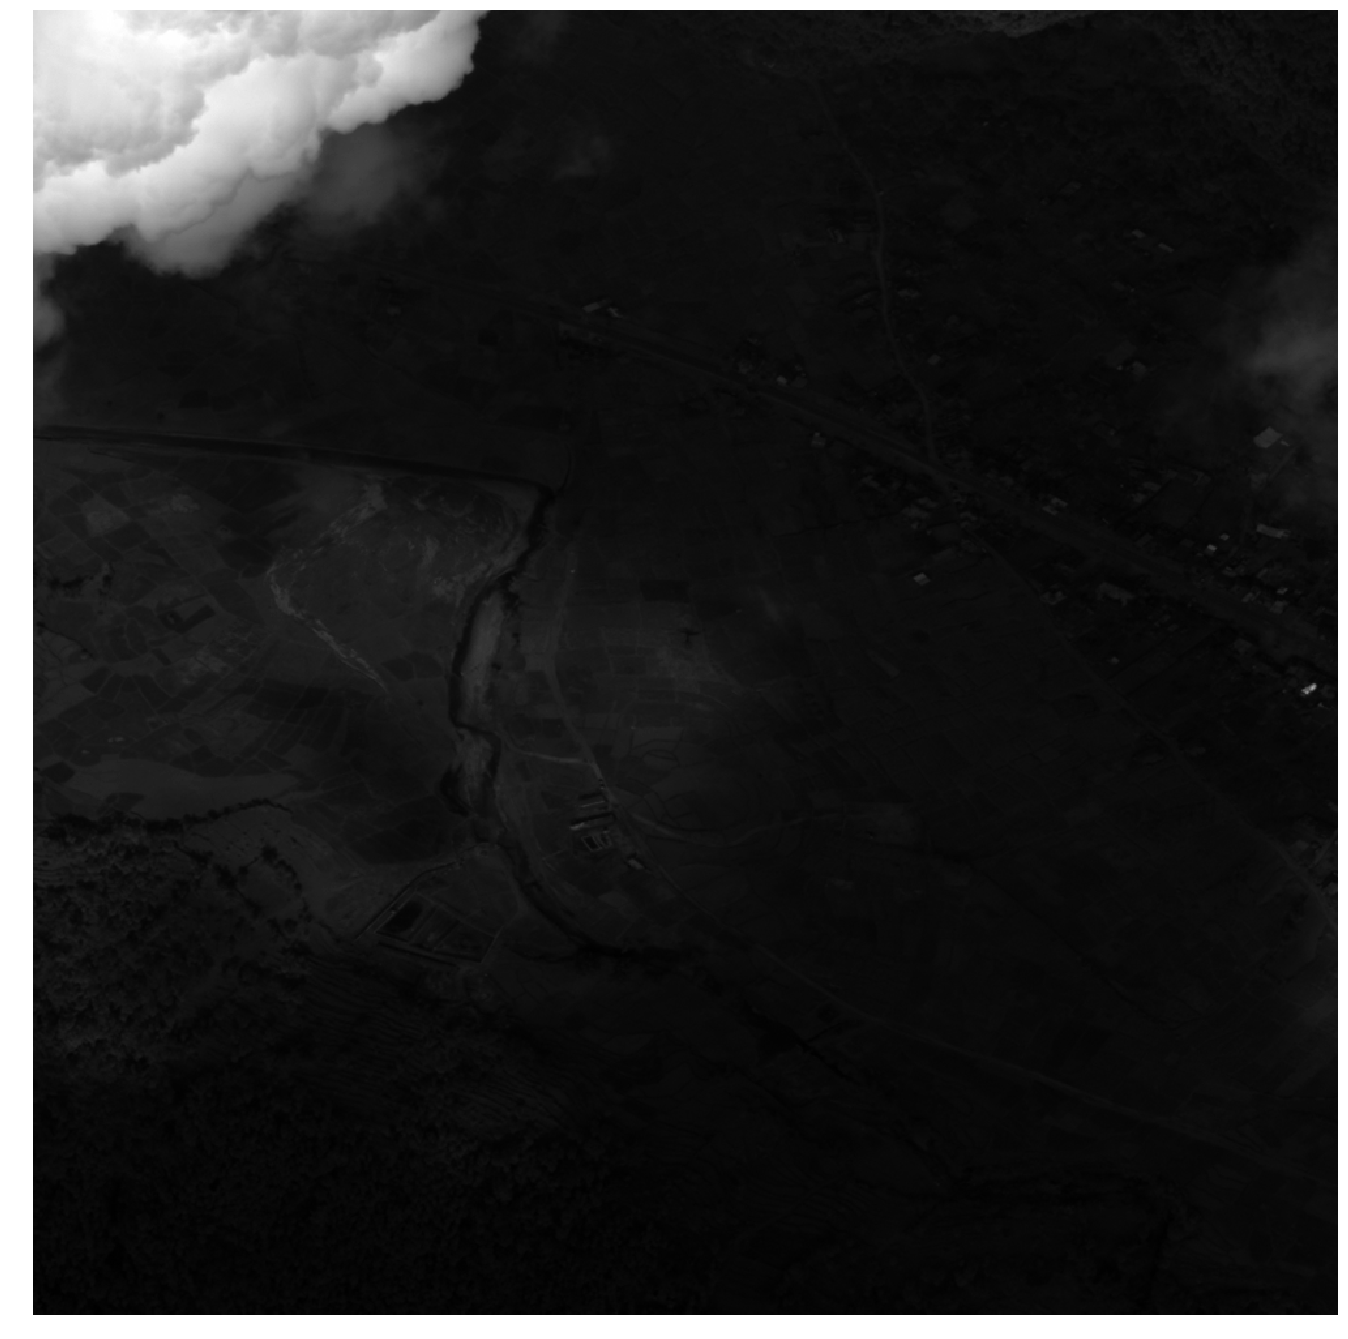

In [22]:
plot(im, f=24)

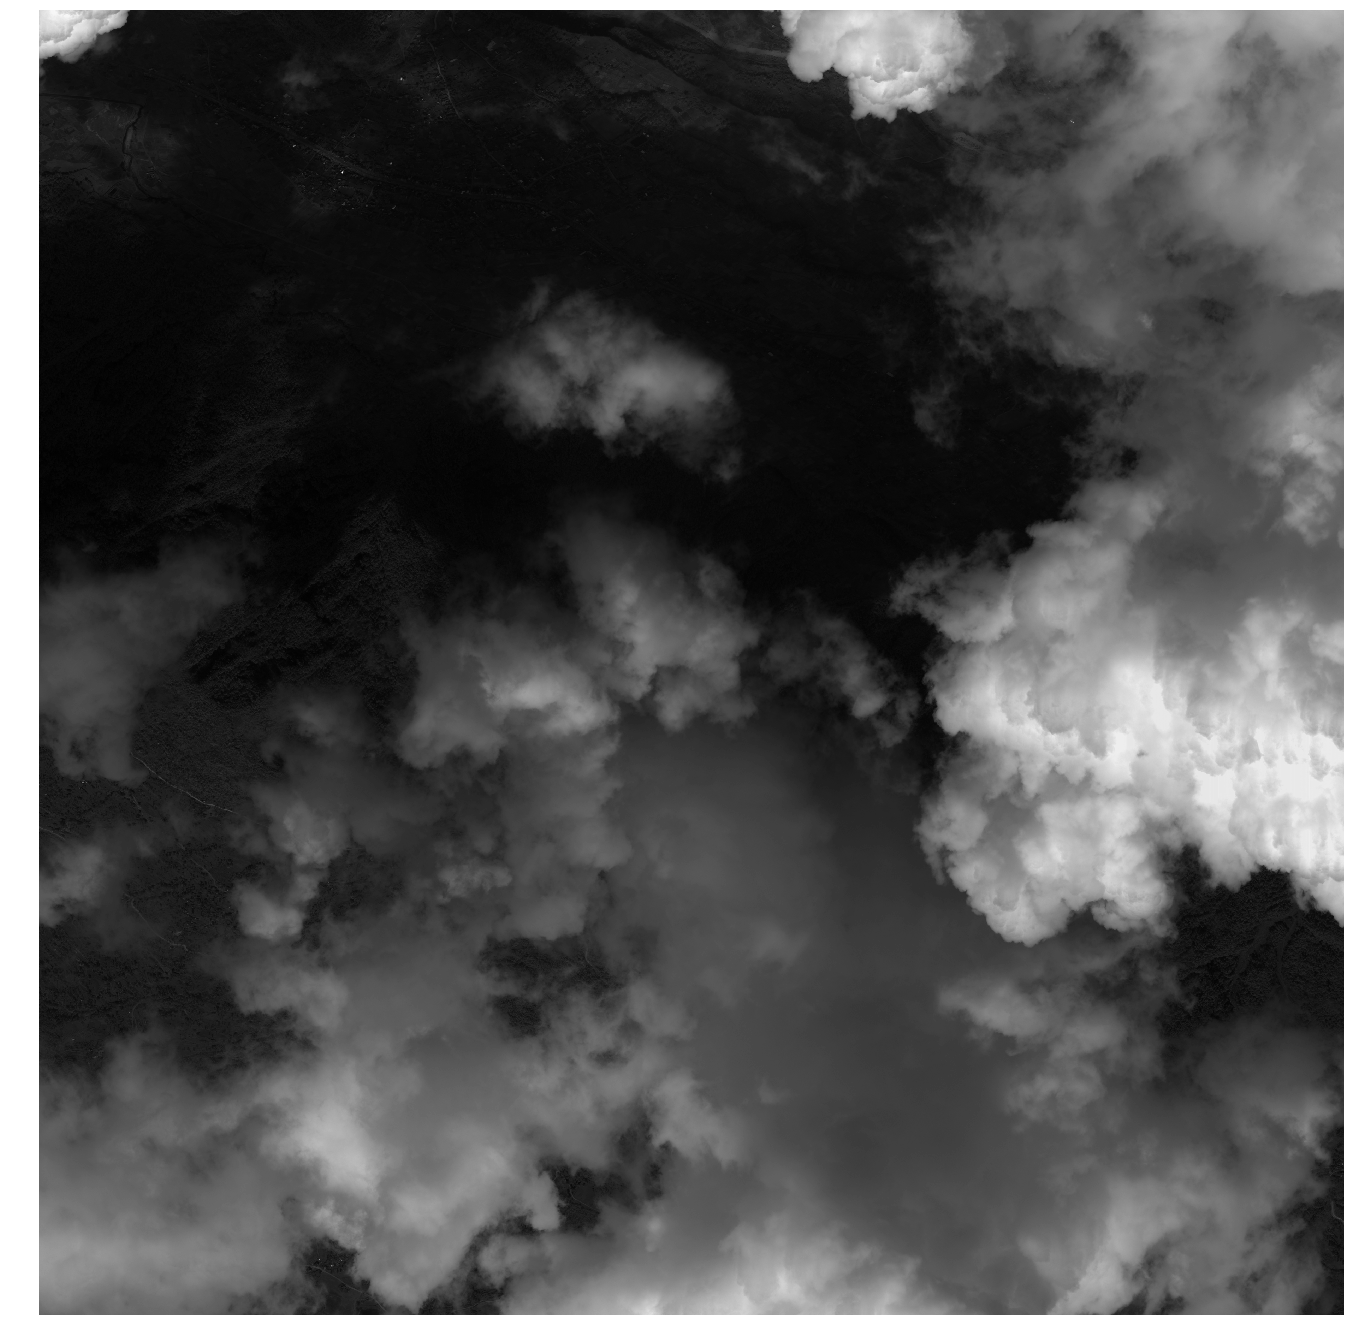

In [23]:
im = band1[:5000, :5000]
plot(im, f=24)

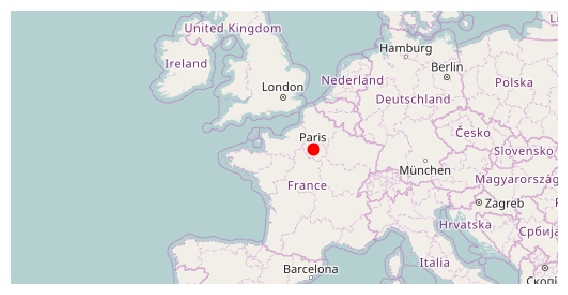

In [28]:
import smopy
map = smopy.Map((42., -1., 55., 3.), z=4)
x, y = map.to_pixels(48.86151, 2.33474)
ax = map.show_mpl(figsize=(8, 6))
ax.plot(x, y, 'or', ms=10, mew=2);

Lowered zoom level to keep map size reasonable. (z = 8)


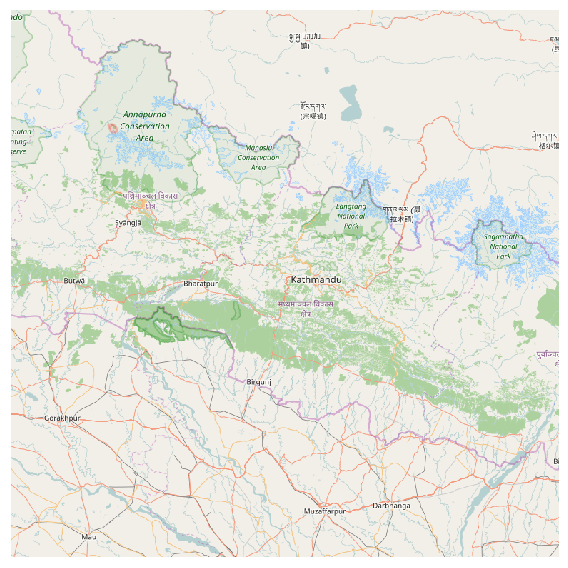

In [119]:
import smopy
# https://tools.wmflabs.org/geohack/geohack.php?pagename=Nepal&params=27_42_N_85_19_E_type:city
la, lo = 27.7, 85.316667
n = 1.0
map = smopy.Map((la-n, lo-n, la+n, lo+n), z=10)
ax = map.show_mpl(figsize=(8, 8))

In [122]:
kath = map.fetch()

In [123]:
type(kath)

PIL.Image.Image

In [124]:
kath_np = np.array(kath)

In [125]:
kath_np.shape

(768, 768, 3)

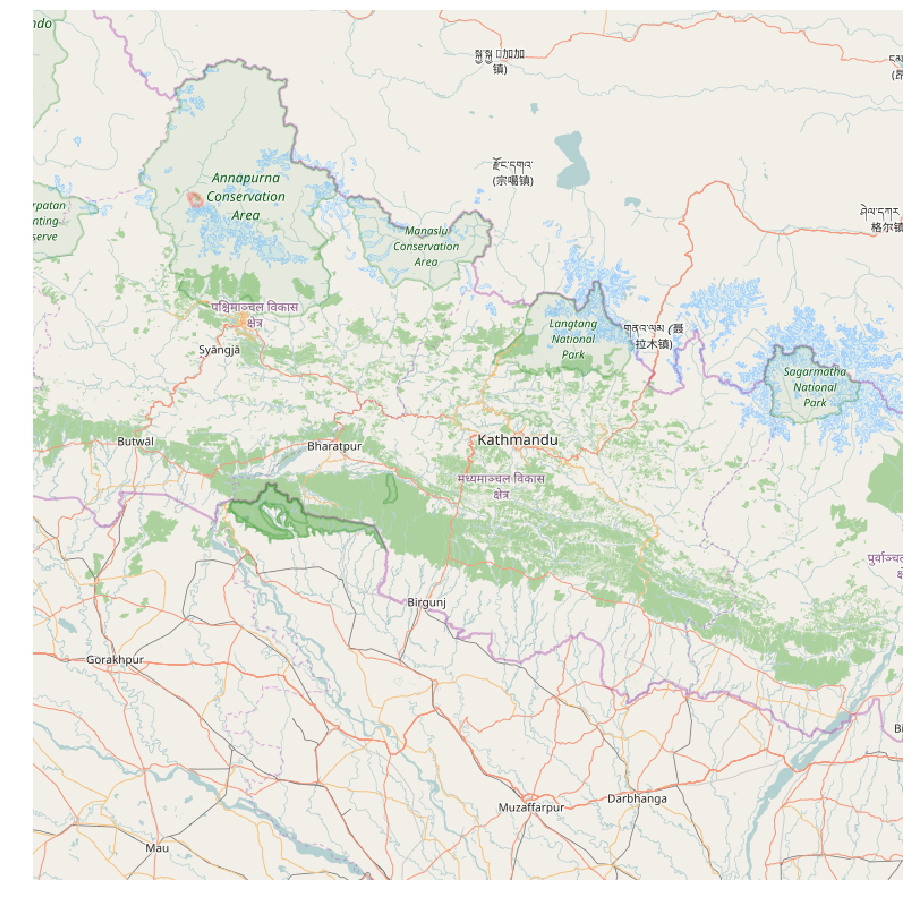

In [128]:
plot(kath_np, f=16)

# From the top

In [44]:
import time

import numpy as np
import rasterio
import smopy
from tools2 import plots, plot
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
filepath = '../data/worldview1_ntf/29APR15WV010500015APR29062253-P1BS-500308331010_01_P059.ntf'
dataset = rasterio.open(filepath)
band1 = dataset.read(1)

/opt/conda/envs/py35/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


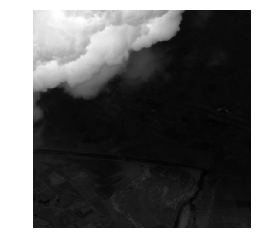

In [24]:
k = 500
im = band1[:k, :k]
plot(im, f=4)

In [45]:
la, lo = 27.7, 85.316667
n = 1.0
box = (la-n, lo-n, la+n, lo+n)
ims = []
for zoom in (6, 7, 8):
    osm = smopy.Map(box, z=zoom)
    npl = osm.fetch()
    npl_np = np.array(npl)
    ims.append(npl_np)
    time.sleep(1)

NameError: name 'im6' is not defined

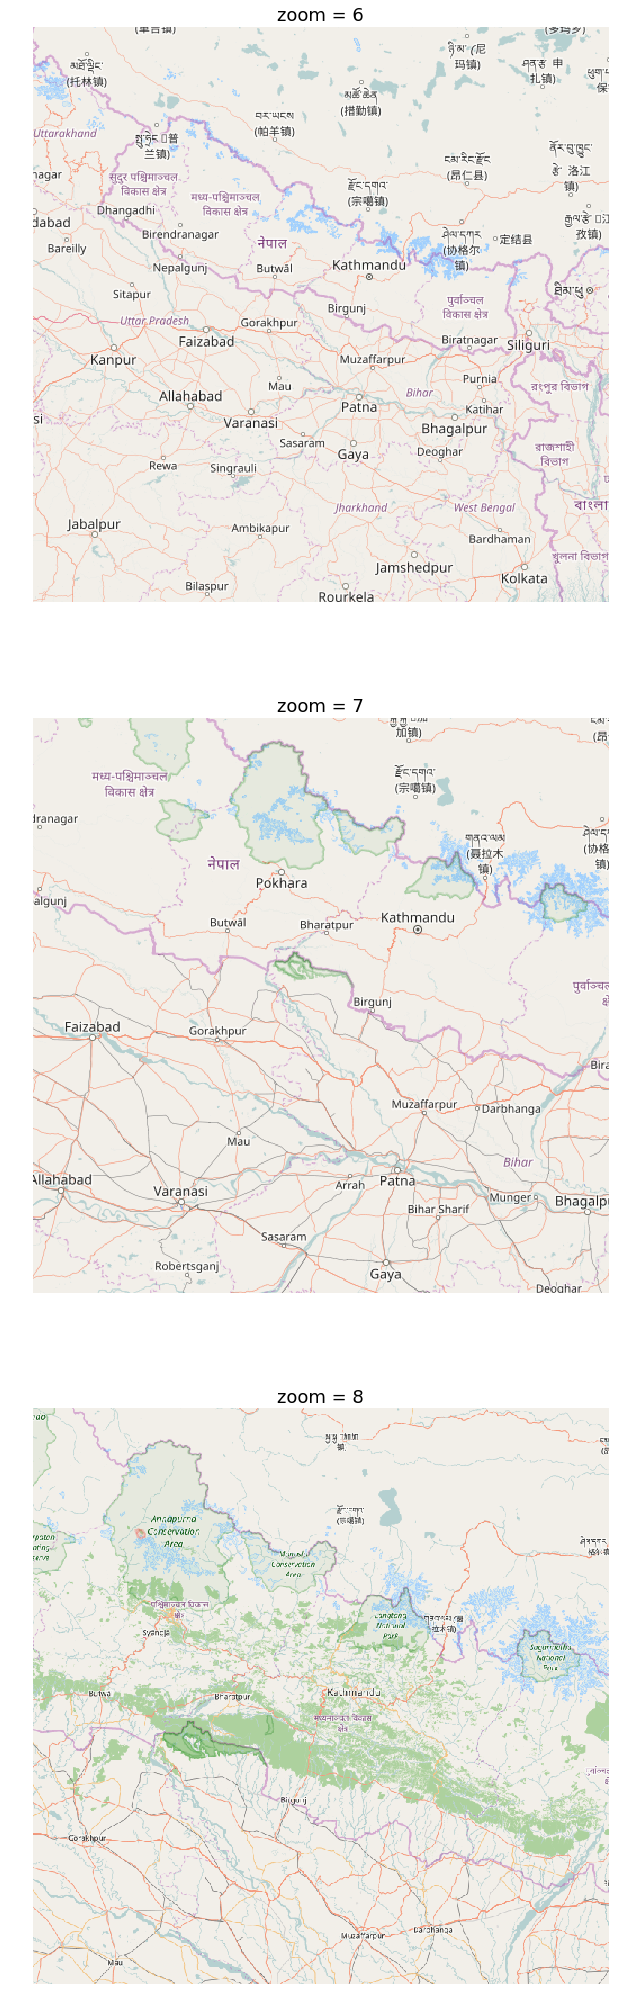

In [55]:
plot(ims, r=len(ims), f=36, t=['zoom = ' + str(i) for i in (6, 7, 8)])

http://wiki.openstreetmap.org/wiki/Zoom_levels

http://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Resolution_and_Scale

Level|	Degree	|m / pixel|	~Scale	|# Tiles
-|-|-|-|-|-|
6	|5.625	|	2,444|	1:10 million	|4,096
7	|2.813	|	1,222	|1:4 million	|16,384
8	|1.406	|	610.984|	1:2 million	|65,536

"Values listed in the column "m / pixels" gives the number of meters per pixel at that zoom level. These values for "m / pixel" are calculated with an earth radius of 6372.7982 km and hold at the equator; for other latitudes the values must be multiplied by the cosine of the latitude."

"resolution = 156543.03 meters/pixel * cos(latitude) / (2 ^ zoomlevel)"

"The OSM tile server supports 20 resolutions."

zoom	|resolution, m/px|	
-|-|-|-|-|-|
17	|1.1943	|
18	|0.5972	|
WorldView-1 | 0.4600
19	|0.2988	|

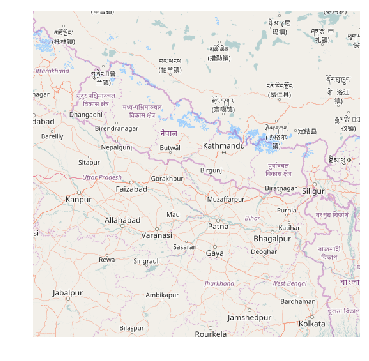

In [77]:
la, lo = 27.7, 85.316667
n = 1.0
box = (la-n, lo-n, la+n, lo+n)
zoom = 6
osm = smopy.Map(box, z=zoom)
npl = osm.fetch()
npl_np = np.array(npl)
plot(npl_np)

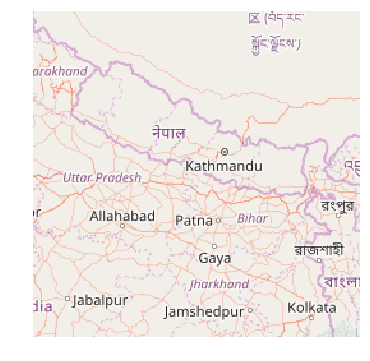

In [78]:
la, lo = 27.7, 85.316667
n = 1.0
box = (la-n, lo-n, la+n, lo+n)
zoom = 5
osm = smopy.Map(box, z=zoom)
npl = osm.fetch()
npl_np = np.array(npl)
plot(npl_np)

In [79]:
dataset.bounds

BoundingBox(left=0.0, bottom=14336.0, right=35840.0, top=0.0)

In [80]:
dataset.shape

(14336, 35840)

In [83]:
import tifffile as tiff

In [84]:
type(dataset)

rasterio._io.RasterReader

In [86]:
band1.shape

(14336, 35840)

In [89]:
band1.nbytes / 1024**3

0.95703125

In [91]:
tiff.imsave('../data/worldview1_ntf/29APR15WV010500015APR29062253-P1BS-500308331010_01_P059.tif', band1)

In [95]:
band1.dtype

dtype('uint16')

In [96]:
loaded = tiff.imread('../data/worldview1_ntf/29APR15WV010500015APR29062253-P1BS-500308331010_01_P059.tif')

/opt/conda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x7efdb8cc6320>,
 <matplotlib.image.AxesImage at 0x7efdb862e320>)

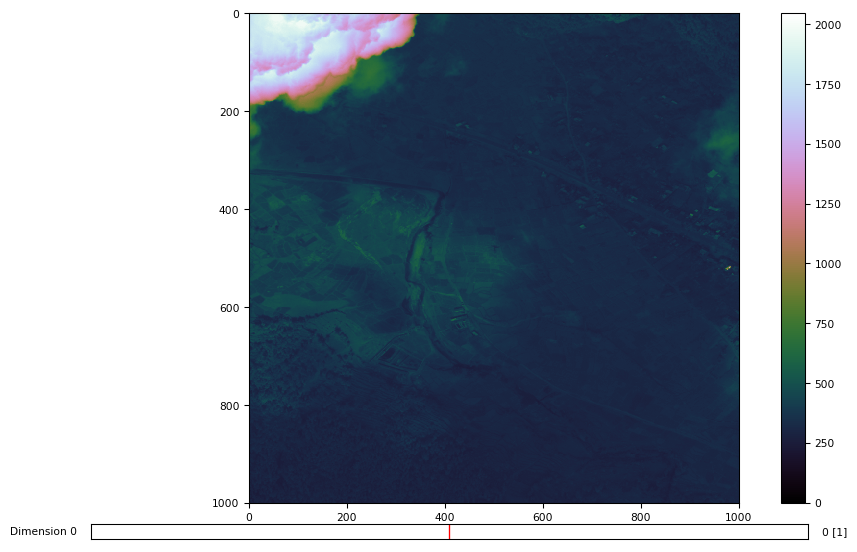

In [98]:
tiff.imshow(loaded[:1000, :1000])